In [43]:
import tensorflow as tf
import numpy as np
import time
import random
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import plot_model

In [5]:
# loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = load_data()
# reshaping the training and testing data 
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],
x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [6]:
# normalizing the values of pixels of images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [10]:
# determine the shape of the input images
inp_shape = x_train.shape[1:]

In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=inp_shape),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(48, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')  
])

In [21]:
# text Description of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 48)        13872     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)              

In [22]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
history = model.fit(x_train, y_train, epochs=1, batch_size=128, verbose=0, validation_split=0.1)

In [49]:
start=time.time()
time.sleep(1)
stop=time.time()
print(stop-start)

1.0013017654418945


In [42]:
duration=[]
for k in range(1000):
    start=time.time()
    model.predict(np.expand_dims(x_test[random.randint(1,len(x_test)-1),:], axis=0))
    stop=time.time()
    duration.append(stop-start)

(array([ 1.,  3.,  2., 11.,  9.,  9., 21., 19., 25., 37., 46., 47., 68.,
        69., 73., 62., 71., 48., 45., 35., 21., 12., 10.,  8.,  7., 13.,
         6.,  4.,  2.,  3.]),
 array([0.02323651, 0.02329522, 0.02335393, 0.02341263, 0.02347134,
        0.02353005, 0.02358875, 0.02364746, 0.02370617, 0.02376487,
        0.02382358, 0.02388229, 0.02394099, 0.0239997 , 0.02405841,
        0.02411711, 0.02417582, 0.02423453, 0.02429323, 0.02435194,
        0.02441065, 0.02446935, 0.02452806, 0.02458676, 0.02464547,
        0.02470418, 0.02476288, 0.02482159, 0.0248803 , 0.024939  ,
        0.02499771]),
 <a list of 30 Patch objects>)

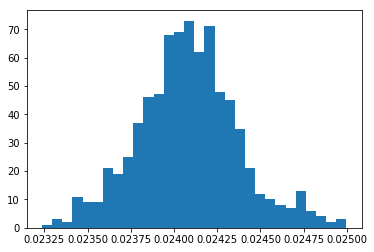

In [54]:
plt.hist([dur for dur in duration if dur<0.025],bins=30)

In [50]:
#700 000 parameters
#baseline
mean(duration)

0.025428701639175415

In [55]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential